# **House sale prices**

## Objectives

* Evaluate multiple machine learning models to predict house prices.
* Use the prepared and transformed data created in previous steps (DataCollection, DataCleaning, and FeatureEngineering).
* Compare model performance to identify the best-performing model.

## Inputs

* Dataset with house prices that has gone through **data cleaning** and **feature engineering** (HousePricesPredictionFeatures_Cleaned.csv).
* Libraries for machine learning and data handling, including:
  - **pandas** for data manipulation.
  - **sklearn** for machine learning and model training.
  - **matplotlib** and **seaborn** for visualizations.

## Outputs

* Performance metrics for multiple trained machine learning models.
* Visualizations showing model predictions and errors for comparison.
* Identification of the best-performing model for further optimization.

### Note on Dataset Usage
This notebook uses the preprocessed dataset (`HousePricesPredictionFeatures_Cleaned.csv`) created in the `FeatureEngineering.ipynb` file. No additional transformations or modifications are made to the dataset in this step. The focus of this notebook is on:
- Training multiple machine learning models to evaluate their baseline performance.
- Comparing models based on metrics such as R2, Cross-Validation and Mean Absolute Error (MAE).
- Preparing for hyperparameter optimization, which is performed in Sales-price-prediction.ipynb.


___

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Heritage-Housing-Issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/Heritage-Housing-Issues'

___

##### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from joblib import load
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Load data

In [2]:
# Load pipeline and dataset
pipeline = load("outputs/pipelines/feature_pipeline_cleaned.pkl")
df_transformed = pd.read_csv("outputs/datasets/collection/HousePricesPredictionFeatures_Cleaned.csv")

# Confirm the dataset is loaded correctly
print("Dataset loaded successfully.")
print(f"Dataset shape: {df_transformed.shape}")
print("Sample of loaded data:")
print(df_transformed.head())

# Define features and target variable
X = df_transformed.drop(columns=['SalePrice'])
y = df_transformed['SalePrice']

Dataset loaded successfully.
Dataset shape: (1460, 6)
Sample of loaded data:
   GarageArea  GrLivArea  TotalBsmtSF  OverallQual  YearRemodAdd  SalePrice
0  204.517964   0.370333    -0.459303          7.0        2003.0   208500.0
1  177.329677  -0.482512     0.466465          6.0        1976.0   181500.0
2  222.579788   0.515013    -0.313369          7.0        2002.0   223500.0
3  232.664420   0.383659    -0.687324          7.0        1970.0   140000.0
4  288.452067   1.299326     0.199680          8.0        2000.0   250000.0


##### The dataset has 1460 rows and 6 columns, match expected output showing it is ready for further analysis.

##### Next, the features (X) and target (y) will be selected from the dataset. 

____

##### This makes sure the model knows which data to use for predictions and which is the target. The shapes of X and y will be checked to confirm everything is ready for modeling.

In [3]:
# Define features (X) and target (y) from df_transformed
X = df_transformed.drop('SalePrice', axis=1)
y = df_transformed['SalePrice']

# Confirm shapes
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (1460, 5)
Target shape: (1460,)


##### The features (X) have 1460 rows and 5 columns (excluding SalesPrice), meaning the dataset includes 5 predictors. The target variable (y) has 1460 rows, confirming that every row has a corresponding target value. This shows the data is properly prepared for modeling.

##### Next, data will be split into training and test sets
___

##### Split Data into Training and Testing Sets and save csv.

In [4]:
# Train-test split with transformed features and original target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Log the shapes of the splits for confirmation
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)

X_train.to_csv('outputs/pipelines/train-test/v1/X_train.csv', index=False)
X_test.to_csv('outputs/pipelines/train-test/v1/X_test.csv', index=False)
y_train.to_csv('outputs/pipelines/train-test/v1/y_train.csv', index=False)
y_test.to_csv('outputs/pipelines/train-test/v1/y_test.csv', index=False)

# List features used in the models
features = X_train.columns
print("Features used in the models:")
for feature in features:
    print(feature)


Training features shape: (1022, 5)
Testing features shape: (438, 5)
Training target shape: (1022,)
Testing target shape: (438,)
Features used in the models:
GarageArea
GrLivArea
TotalBsmtSF
OverallQual
YearRemodAdd


##### **The data is split into training and testing sets:**
**Training features:** 1022 rows, 5 columns.

**Testing features:** 438 rows, 5 columns.

**Training target:** 1022 rows.

**Testing target:** 438 rows.

The split ensures the model can be trained and tested on separate data for fair evaluation.

The training and testing datasets are also saved as CSV files for reproducibility:

**X_train.csv, X_test.csv (features)**

**y_train.csv, y_test.csv (target)**

Next, different pipelines will be trained using various regression models.

___

##### Create a machine learning pipeline (**Linear Regression**)

This pipeline scales the features using StandardScaler and trains a Linear Regression model. Cross-validation with 5 folds was used to check the model's performance.

In [8]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the features
    ('model', LinearRegression())  # Model to train
])

# Perform cross-validation on Linear Regression model
cross_val_scores_lr = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

# Print out the average cross-validation score and standard deviation
print(f"Cross-Validation R2 Scores for Linear Regression: {cross_val_scores_lr}")
print(f"Average R2 Score: {cross_val_scores_lr.mean():.2f}")
print(f"Standard Deviation of R2 Score: {cross_val_scores_lr.std():.2f}")

# Fit the pipeline
pipeline.fit(X_train, y_train)

Cross-Validation R2 Scores for Linear Regression: [0.78562338 0.39518213 0.79962175 0.80133092 0.79881588]
Average R2 Score: 0.72
Standard Deviation of R2 Score: 0.16


Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

**Results:**

**R2 Scores per fold:** [0.7856, 0.3952, 0.7996, 0.8013, 0.7988]

**Average R2 Score:** 0.72

**Standard Deviation:** 0.16

The model's average R2 score of 0.72 shows good predictions, but the high standard deviation (0.16) means it performs unevenly across the folds.

Next, scatter plots will show the results, comparing actual and predicted house prices for the training and testing sets. This helps to better understand the model’s performance.

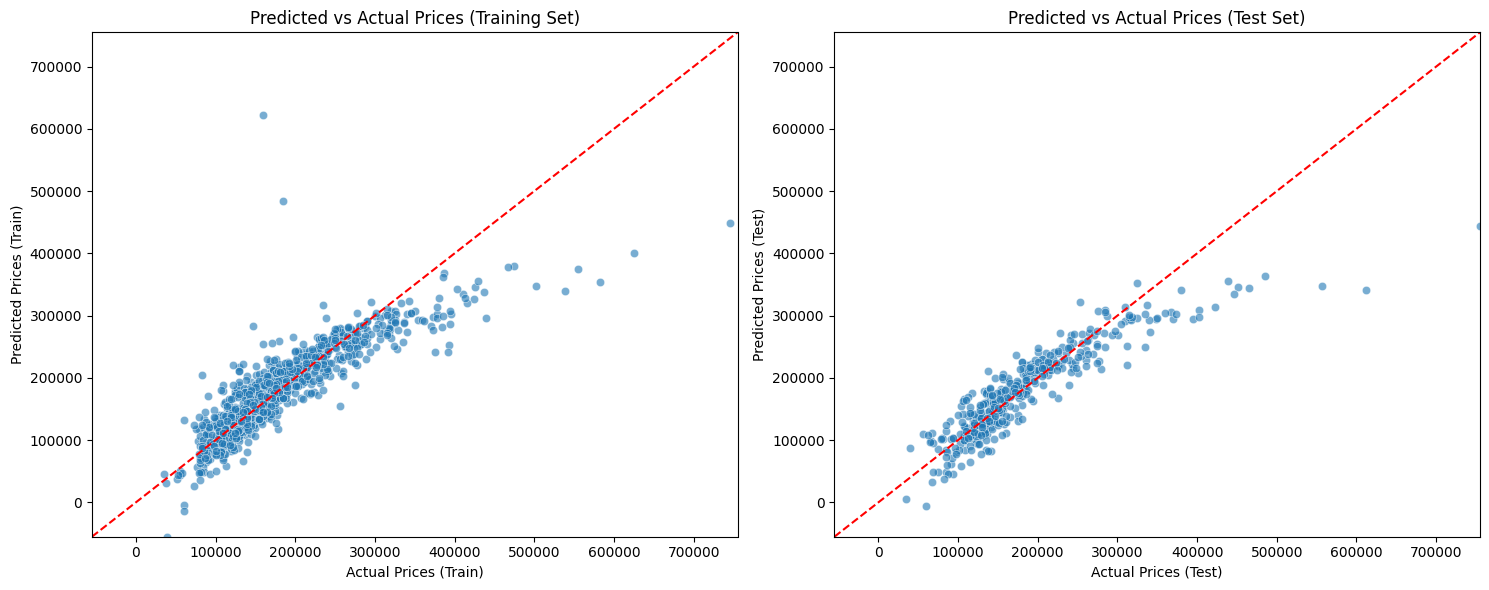

R2 Score (Trainingset): 0.74
R2 Score (Testset): 0.80
Mean Absolute Error (Training set): 24423.80
Mean Absolute Error (Test set): 24051.05


In [11]:
# Visualize predicted vs actual values for the training and test dataset
# Predict values for training and test datasets
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Create subplots to compare actual vs predicted values
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Set common limits for both plots
min_value = min(y_train.min(), y_test.min(), y_pred_train.min(), y_pred_test.min())
max_value = max(y_train.max(), y_test.max(), y_pred_train.max(), y_pred_test.max())

# Training set
sns.scatterplot(x=y_train, y=y_pred_train, ax=axes[0], alpha=0.6)
axes[0].plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--')  # Add a red line for predictions
axes[0].set_xlabel('Actual Prices (Train)')
axes[0].set_ylabel('Predicted Prices (Train)')
axes[0].set_title('Predicted vs Actual Prices (Training Set)')
axes[0].set_xlim(min_value, max_value)
axes[0].set_ylim(min_value, max_value)

# Test set
sns.scatterplot(x=y_test, y=y_pred_test, ax=axes[1], alpha=0.6)
axes[1].plot([min_value, max_value], [min_value, max_value], color='red', linestyle='--')  # Add a red line for predictions
axes[1].set_xlabel('Actual Prices (Test)')
axes[1].set_ylabel('Predicted Prices (Test)')
axes[1].set_title('Predicted vs Actual Prices (Test Set)')
axes[1].set_xlim(min_value, max_value)
axes[1].set_ylim(min_value, max_value)

plt.tight_layout()
plt.show()

# Calculate R2 scores for training and test sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Calculate MAE for training and test sets
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print R2 scores
print(f"R2 Score (Trainingset): {r2_train:.2f}")
print(f"R2 Score (Testset): {r2_test:.2f}")
print(f"Mean Absolute Error (Training set): {mae_train:.2f}")
print(f"Mean Absolute Error (Test set): {mae_test:.2f}")

**Results:**

**R2 Score (Training set: 0.74, Test set: 0.80):**

The model explains 74% of the variance in the training data, which is slightly below the required threshold of 75%. However, the R2 score on the test set is 80%, meeting and exceeding the requirement for unseen data. This shows that the model generalizes well but could potentially be improved on the training set.

**Mean Absolute Error (Training set: 24,423.80, Test set: 24,051.05):**

The average prediction error is around $24,000 for both training and test sets. The similar MAE values indicate the model is stable and not overfitting.

Next, **the RandomForestRegressor** will be trained.

___

##### Create a machine learning pipeline (**RandomForestRegressor**)

Now a **RandomForestRegressor** will be trained with cross-validation to evaluate R2 scores and model stability. Cross-validation with 5 folds was used to check the model's performance. The pipeline is then fitted to the training data for predictions.

In [12]:
# Update pipeline to include the best parameters
pipeline = Pipeline([
    ('model', RandomForestRegressor())  # Model to train
])

# Perform cross-validation on Random Forest model
cross_val_scores_rf = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

# Print out the average cross-validation score and standard deviation
print(f"Cross-Validation R2 Scores for Random Forest: {cross_val_scores_rf}")
print(f"Average R2 Score: {cross_val_scores_rf.mean():.2f}")
print(f"Standard Deviation of R2 Score: {cross_val_scores_rf.std():.2f}")

# Fit the pipeline
pipeline.fit(X_train, y_train)

Cross-Validation R2 Scores for Random Forest: [0.81053647 0.49941146 0.84662361 0.83757181 0.84877168]
Average R2 Score: 0.77
Standard Deviation of R2 Score: 0.14


Pipeline(steps=[('model', RandomForestRegressor())])

**Results:**

**R2 Scores per fold:** [0.8105, 0.4994, 0.8466, 0.8376, 0.8488]

**Average R2 Score:** 0.77

**Standard Deviation:** 0.14

The **RandomForestRegressor** achieved an average R2 score of 0.77, meeting the 0.75 requirement. The standard deviation of 0.14 shows the model's performance is relatively consistent across folds.

Next, scatter plots will show the results, comparing actual and predicted house prices for the training and testing sets. This helps to better understand the model’s performance.

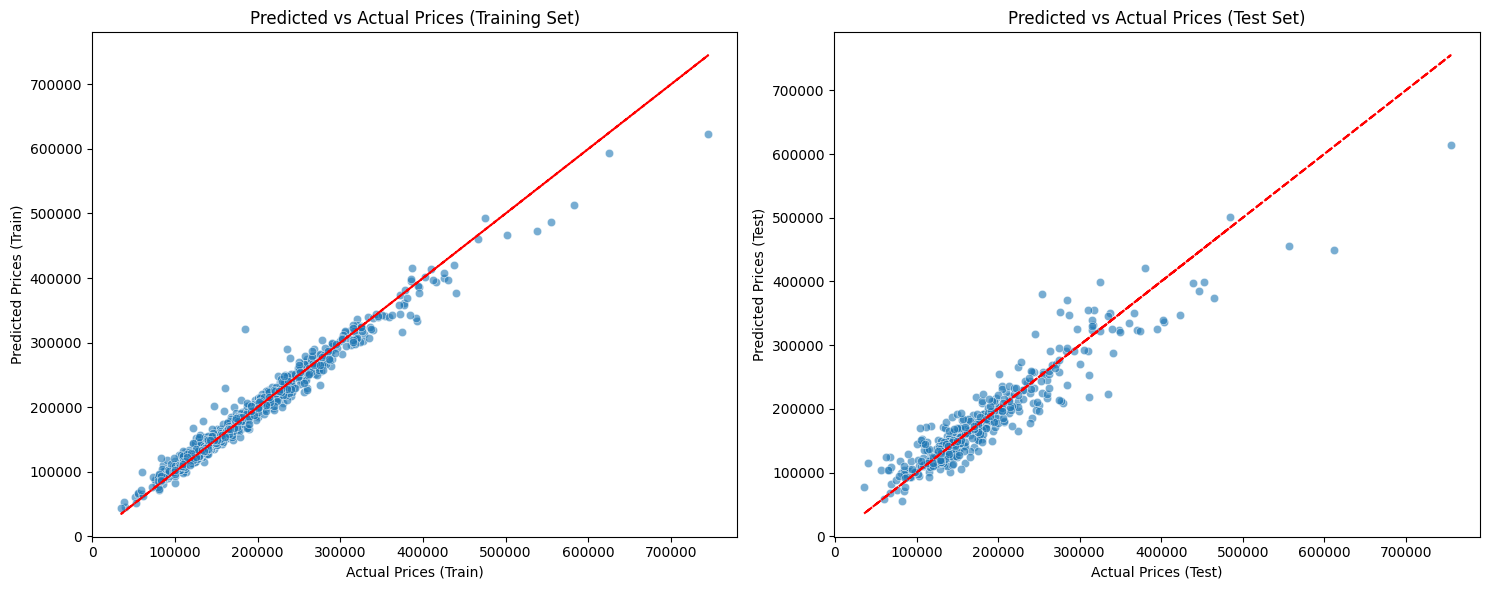

R2 Score (Training set): 0.97
R2 Score (Test set): 0.88
Mean Absolute Error (Training set): 7940.64
Mean Absolute Error (Test set): 19319.12


In [13]:
# Visualize predicted vs actual values for the training and test dataset
def plot_train_test_results(X_train, y_train, X_test, y_test, pipeline):
    # Predict values for training and test datasets
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    # Create subplots to compare actual vs predicted values
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Training set
    sns.scatterplot(x=y_train, y=y_pred_train, ax=axes[0], alpha=0.6)
    axes[0].plot(y_train, y_train, color='red', linestyle='--')  # Add a red line for perfect predictions
    axes[0].set_xlabel('Actual Prices (Train)')
    axes[0].set_ylabel('Predicted Prices (Train)')
    axes[0].set_title('Predicted vs Actual Prices (Training Set)')

    # Test set
    sns.scatterplot(x=y_test, y=y_pred_test, ax=axes[1], alpha=0.6)
    axes[1].plot(y_test, y_test, color='red', linestyle='--')  # Add a red line for perfect predictions
    axes[1].set_xlabel('Actual Prices (Test)')
    axes[1].set_ylabel('Predicted Prices (Test)')
    axes[1].set_title('Predicted vs Actual Prices (Test Set)')

    plt.tight_layout()
    plt.show()

    # Calculate R2 scores for training and test sets
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Calculate MAE for training and test sets
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # Print R2 and MAE scores
    print(f"R2 Score (Training set): {r2_train:.2f}")
    print(f"R2 Score (Test set): {r2_test:.2f}")
    print(f"Mean Absolute Error (Training set): {mae_train:.2f}")
    print(f"Mean Absolute Error (Test set): {mae_test:.2f}")

# Use the function to visualize training and test results
plot_train_test_results(X_train, y_train, X_test, y_test, pipeline)

**Results:**

**R2 Score (Training set: 0.97, Test set: 0.88):**

The model explains 97% of the variance in the training data, well above the required 75%. The test set R2 is 88%, showing the model works well with unseen data.

**Mean Absolute Error (Training set: 7940,64, Test set: 19319,12):**

The average error is about $8,000 for training and $19,000 for testing. While the error is higher for test data, the model remains accurate and reliable.

Next, the **GradientBoostingRegressor** will be trained.

___

##### Create a machine learning pipeline (**GradientBoostingRegressor**)

Now a **GradientBoostingRegressor** will be trained with cross-validation to evaluate R2 scores and model stability. Cross-validation with 5 folds is used to assess the model's performance. The pipeline is then fitted to the training data for predictions.

In [14]:
# Create a machine learning pipeline with Gradient Boosting
pipeline = Pipeline([
    ('model', GradientBoostingRegressor(random_state=42))  # Model to train
])

# Perform cross-validation on Gradient Boosting model
cross_val_scores_gb = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

# Print out the average cross-validation score and standard deviation
print(f"Cross-Validation R2 Scores for Gradient Boosting: {cross_val_scores_gb}")
print(f"Average R2 Score: {cross_val_scores_gb.mean():.2f}")
print(f"Standard Deviation of R2 Score: {cross_val_scores_gb.std():.2f}")

# Train the pipeline with initial hyperparameters
pipeline.fit(X_train, y_train)


Cross-Validation R2 Scores for Gradient Boosting: [0.79686274 0.2756315  0.85055102 0.8279153  0.8490997 ]
Average R2 Score: 0.72
Standard Deviation of R2 Score: 0.22


Pipeline(steps=[('model', GradientBoostingRegressor(random_state=42))])

**Results:**

**Cross-Validation R2 Scores:** [0.7969, 0.2756, 0.8506, 0.8279, 0.8491]

**Average R2 Score:** 0.72

**Standard Deviation:** 0.22

The **GradientBoostingRegressor** got an average R2 score of 0.72, below the required 0.75. The high standard deviation (0.22) shows the model's performance is not stable. Improvements or tuning are needed.

Next, scatter plots will show the results, comparing actual and predicted house prices for the training and testing sets. This helps to better understand the model’s performance.

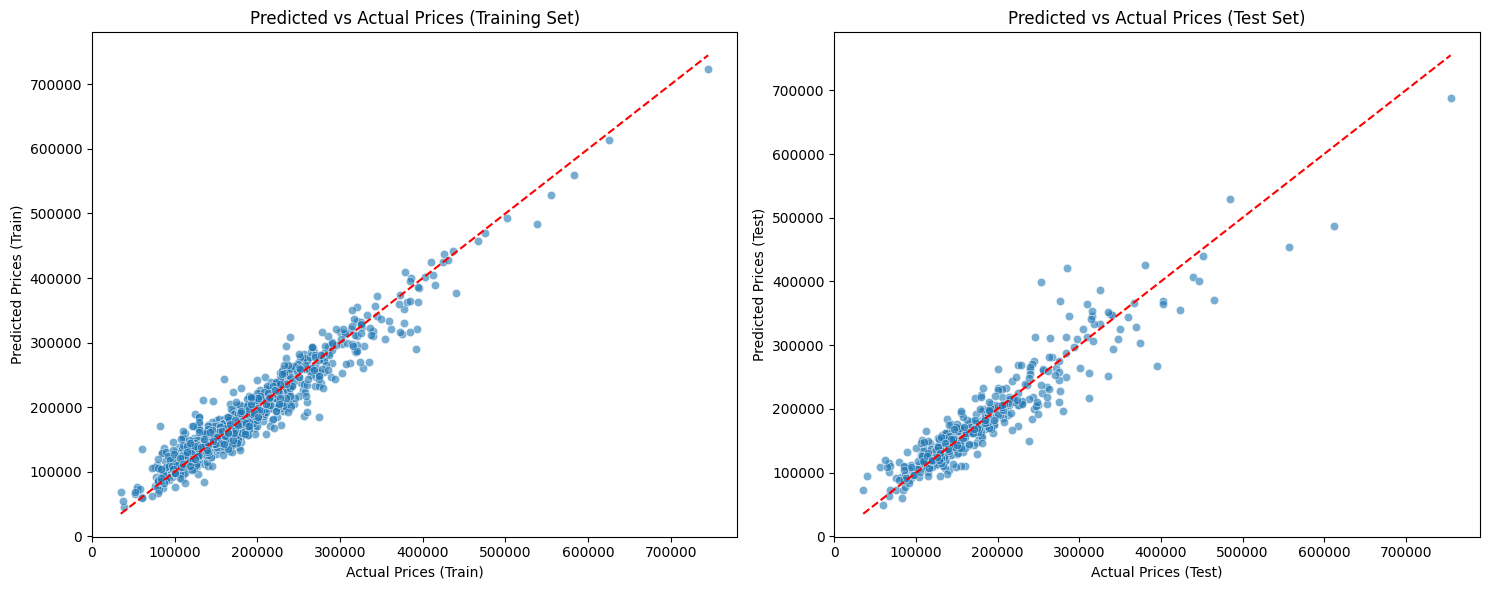

R2 Score (Training set): 0.93
R2 Score (Test set): 0.88
Mean Absolute Error (Training set): 14959.28
Mean Absolute Error (Test set): 19120.64


In [15]:
# Visualize predicted vs actual values for the training and test dataset
def plot_gradient_boosting_results(X_train, y_train, X_test, y_test, pipeline):
    # Predict values for training and test datasets
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    # Create subplots to compare actual vs predicted values
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Training set
    sns.scatterplot(x=y_train, y=y_pred_train, ax=axes[0], alpha=0.6)
    axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 
                 color='red', linestyle='--')  # Add a red line for perfect predictions
    axes[0].set_xlabel('Actual Prices (Train)')
    axes[0].set_ylabel('Predicted Prices (Train)')
    axes[0].set_title('Predicted vs Actual Prices (Training Set)')
    axes[0].set_xlim(left=0)

    # Test set
    sns.scatterplot(x=y_test, y=y_pred_test, ax=axes[1], alpha=0.6)
    axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
                 color='red', linestyle='--')
    axes[1].set_xlabel('Actual Prices (Test)')
    axes[1].set_ylabel('Predicted Prices (Test)')
    axes[1].set_title('Predicted vs Actual Prices (Test Set)')
    axes[1].set_xlim(left=0)

    plt.tight_layout()
    plt.show()

    # Calculate R2 scores
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    # Calculate MAE for training and test sets
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    # Print R2 and MAE scores
    print(f"R2 Score (Training set): {r2_train:.2f}")
    print(f"R2 Score (Test set): {r2_test:.2f}")
    print(f"Mean Absolute Error (Training set): {mae_train:.2f}")
    print(f"Mean Absolute Error (Test set): {mae_test:.2f}")

# Use the function to visualize training and test results
plot_gradient_boosting_results(X_train, y_train, X_test, y_test, pipeline)


**Results:**

**R2 Score (Training set: 0.93, Test set: 0.88):**

The model explains 93% of the training data and 88% of the test data. Both scores meet the R2 requirement (>0.75), showing good performance and generalization.

**Mean Absolute Error (Training set: 14,959.28, Test set: 19,120.64):**

The model’s average prediction error is around $15,000 for training and $19,000 for testing. The errors are close, meaning no overfitting.

Next, the **XGBRegressor** will be trained.

___

##### Create a machine learning pipeline (**XGBRegressor**)

An **XGBRegressor** is trained with 5-fold cross-validation. This checks the model’s R2 score and stability.
The pipeline is then fitted to the training data for predictions.

In [16]:
# Create a pipeline with XGB
pipeline_xgb = Pipeline([
    ('model', xgb.XGBRegressor(objective='reg:squarederror', random_state=42))  # Model to train
])

# Run cross-validation on XGB model
cross_val_scores_xgb = cross_val_score(pipeline_xgb, X_train, y_train, cv=5, scoring='r2')

# Print average R2 score and standard deviation
print(f"Cross-Validation R2 Scores for XGB: {cross_val_scores_xgb}")
print(f"Average R2 Score: {cross_val_scores_xgb.mean():.2f}")
print(f"Standard Deviation of R2 Score: {cross_val_scores_xgb.std():.2f}")

# Fit the pipeline with initial hyperparameters
pipeline_xgb.fit(X_train, y_train)


/home/cistudent/.local/lib/python3.12/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/cistudent/.local/lib/python3.12/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/cistudent/.local/lib/python3.12/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/cistudent/.local/lib/python3.12/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_

Cross-Validation R2 Scores for XGB: [0.67346927 0.3591148  0.84151541 0.77015844 0.81826545]
Average R2 Score: 0.69
Standard Deviation of R2 Score: 0.18


Pipeline(steps=[('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=42, ...))])

**Results:**

**Cross-Validation R2 Scores for XGBRegressor:** [0.67, 0.36, 0.84, 0.77, 0.82]

**Average R2 Score: 0.69**

**Standard Deviation: 0.18**

The average R2 is below the required 0.75, and the standard deviation shows the model's performance is not stable across folds. Optimization is needed.

Next, scatter plots will show the results, comparing actual and predicted house prices for the training and testing sets. This helps to better understand the model’s performance.

/home/cistudent/.local/lib/python3.12/site-packages/xgboost/data.py:312: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/home/cistudent/.local/lib/python3.12/site-packages/xgboost/data.py:314: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
/home/cistudent/.local/lib/python3.12/site-packages/xgboost/data.py:345: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
/home/cistudent/.local/lib/python3.12/site-packages/xgboost/data.py:336: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_float or is_

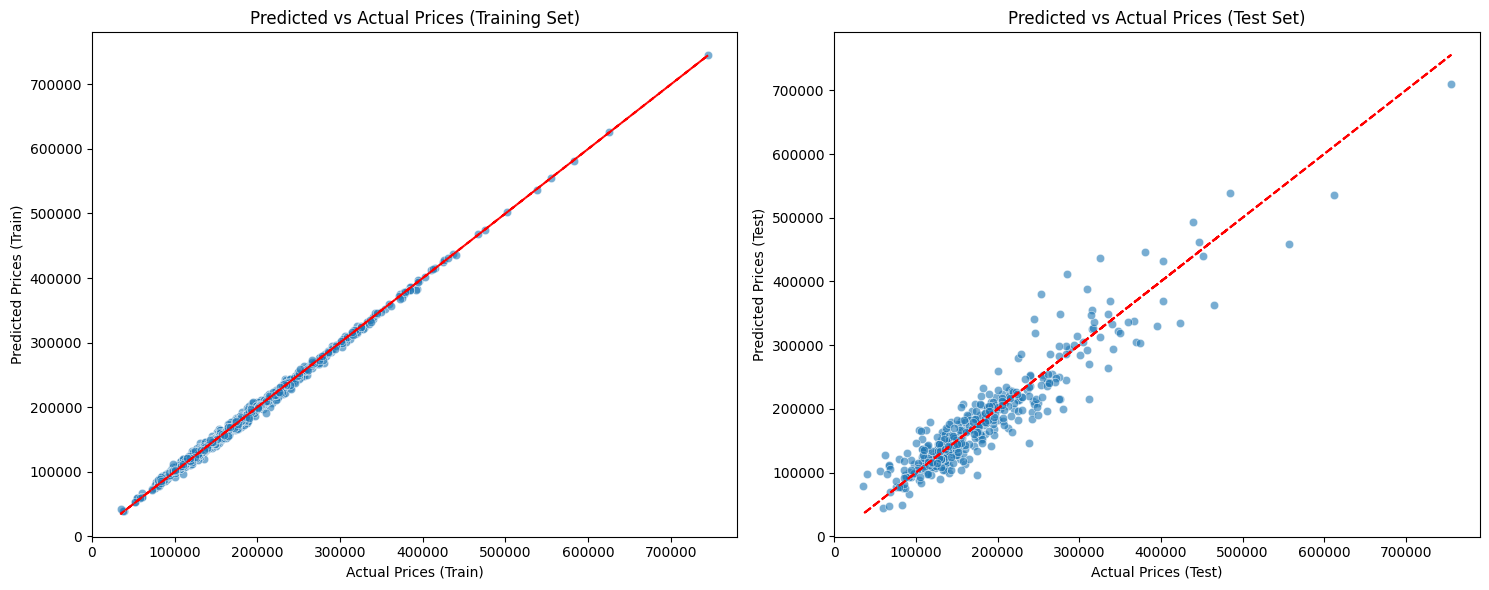

R2 Score (Training set): 1.00
R2 Score (Test set): 0.88
Mean Absolute Error (Training set): 2968.37
Mean Absolute Error (Test set): 20500.45


In [17]:
# Visualize predicted vs actual values for the training and test dataset
def plot_xgb_results(X_train, y_train, X_test, y_test, pipeline_xgb):

    # Make predictions for training and test datasets
    y_pred_train_xgb = pipeline_xgb.predict(X_train)
    y_pred_test_xgb = pipeline_xgb.predict(X_test)

    # Create subplots to compare actual vs predicted values
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    # Training set
    sns.scatterplot(x=y_train, y=y_pred_train_xgb, ax=axes[0], alpha=0.6)
    axes[0].plot(y_train, y_train, color='red', linestyle='--')  # Add a red line for perfect predictions
    axes[0].set_xlabel('Actual Prices (Train)')
    axes[0].set_ylabel('Predicted Prices (Train)')
    axes[0].set_title('Predicted vs Actual Prices (Training Set)')
    axes[0].set_xlim(left=0)

    # Test set
    sns.scatterplot(x=y_test, y=y_pred_test_xgb, ax=axes[1], alpha=0.6)
    axes[1].plot(y_test, y_test, color='red', linestyle='--')  # Add a red line for perfect predictions
    axes[1].set_xlabel('Actual Prices (Test)')
    axes[1].set_ylabel('Predicted Prices (Test)')
    axes[1].set_title('Predicted vs Actual Prices (Test Set)')
    axes[1].set_xlim(left=0)

    plt.tight_layout()
    plt.show()

    # Print R2 scores
    r2_train_xgb = r2_score(y_train, y_pred_train_xgb)
    r2_test_xgb = r2_score(y_test, y_pred_test_xgb)

    # Calculate MAE for training and test sets
    mae_train_xgb = mean_absolute_error(y_train, y_pred_train_xgb)
    mae_test_xgb = mean_absolute_error(y_test, y_pred_test_xgb)

    # Print R2 and MAE scores
    print(f"R2 Score (Training set): {r2_train_xgb:.2f}")
    print(f"R2 Score (Test set): {r2_test_xgb:.2f}")
    print(f"Mean Absolute Error (Training set): {mae_train_xgb:.2f}")
    print(f"Mean Absolute Error (Test set): {mae_test_xgb:.2f}")

# Use the function to visualize training and test results
plot_xgb_results(X_train, y_train, X_test, y_test, pipeline_xgb)


**Results:**

**R2 Score (Training: 1.00, Test: 0.88):**

The model explains 100% of the training data but 87% on the test set. This shows some overfitting, though the test score meets the required 0.75.

**Mean Absolute Error (Training: 2968,37, Test: 20500,45):**

The training error is very low, showing overfitting. The test error (~$20,500) is acceptable but could improve.

Next, the last model **ExtraTreesRegressor** will be trained.

___

##### Create a machine learning pipeline (**ExtraTreesRegressor**)

An ExtraTreesRegressor is trained with 5-fold cross-validation. This checks the model’s R2 score and stability.
The pipeline is then fitted to the training data for predictions.

In [18]:
# Create a machine learning pipeline with Extra Trees Regressor
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scale the features
    ('model', ExtraTreesRegressor(random_state=42))  # Model to train
])

# Perform cross-validation on Extra Trees Regressor model
cross_val_scores_et = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

# Print out the average cross-validation score and standard deviation
print(f"Cross-Validation R2 Scores for Extra Trees Regressor: {cross_val_scores_et}")
print(f"Average R2 Score: {cross_val_scores_et.mean():.2f}")
print(f"Standard Deviation of R2 Score: {cross_val_scores_et.std():.2f}")

# Train the pipeline
pipeline.fit(X_train, y_train)

Cross-Validation R2 Scores for Extra Trees Regressor: [0.81162768 0.3997525  0.83763259 0.84100872 0.84853931]
Average R2 Score: 0.75
Standard Deviation of R2 Score: 0.17


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', ExtraTreesRegressor(random_state=42))])

**Results:**

**Cross-Validation R2 Scores for Extra Trees Regressor:** [0.81, 0.40, 0.84, 0.84, 0.85]

**Average R2 Score:** 0.75

**Standard Deviation:** 0.17

The average R2 meets the required threshold of 0.75, and the standard deviation indicates moderate variation in performance across folds.

Next, scatter plots will visualize the results, comparing actual and predicted house prices for both training and testing sets to better assess the model’s predictions.

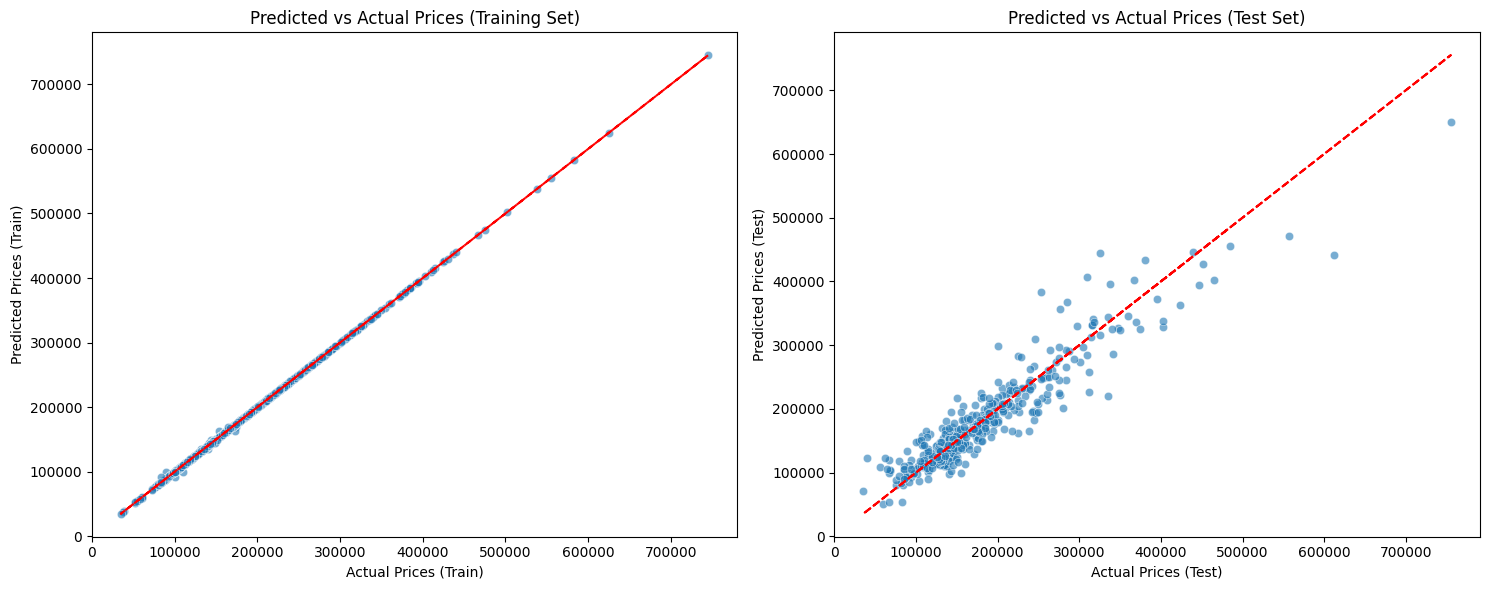

R2 Score (Training set): 1.00
R2 Score (Test set): 0.88
Mean Absolute Error (Training set): 91.75
Mean Absolute Error (Test set): 19561.53


In [19]:
# Visualize predicted vs actual values for the training and test dataset
# Predict values for training and test datasets
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

# Create subplots to compare actual vs predicted values
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Training set
sns.scatterplot(x=y_train, y=y_pred_train, ax=axes[0], alpha=0.6)
axes[0].plot(y_train, y_train, color='red', linestyle='--')  # Add a red line for perfect predictions
axes[0].set_xlabel('Actual Prices (Train)')
axes[0].set_ylabel('Predicted Prices (Train)')
axes[0].set_title('Predicted vs Actual Prices (Training Set)')
axes[0].set_xlim(left=0)

# Test set
sns.scatterplot(x=y_test, y=y_pred_test, ax=axes[1], alpha=0.6)
axes[1].plot(y_test, y_test, color='red', linestyle='--')  # Add a red line for perfect predictions
axes[1].set_xlabel('Actual Prices (Test)')
axes[1].set_ylabel('Predicted Prices (Test)')
axes[1].set_title('Predicted vs Actual Prices (Test Set)')
axes[1].set_xlim(left=0)

plt.tight_layout()
plt.show()

# Calculate R2 scores for training and test sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# Calculate MAE for training and test sets
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Print R2 and MAE scores
print(f"R2 Score (Training set): {r2_train:.2f}")
print(f"R2 Score (Test set): {r2_test:.2f}")
print(f"Mean Absolute Error (Training set): {mae_train:.2f}")
print(f"Mean Absolute Error (Test set): {mae_test:.2f}")

**Results:**

**R2 Score (Training: 1.00, Test: 0.88):**

The model perfectly fits the training data and performs well on the test set with an R2 of 0.88, meeting the required 0.75.

**Mean Absolute Error (Training: 91,75, Test: 19561,53):**

The training error is extremely low, but the test error is around $19,561, showing some prediction differences on unseen data.

The model works well, but the low training error could mean slight overfitting.

___

## **Summary of the tested models**

### **LinearRegression:**
- **Cross-Validation R2 Scores:** [0.7856, 0.3952, 0.7996, 0.8013, 0.7988]
- **Average Cross-Validation R2 Score:** 0.72
- **Standard Deviation:** 0.16
- **R2 Score (Training set):** 0.74
- **R2 Score (Test set):** 0.80
- **Mean Absolute Error (Training set):** 24,423.80
- **Mean Absolute Error (Test set):** 24,051.05

**LinearRegression** shows acceptable performance with a good balance between training and test scores. However, the high **cross-validation standard deviation (0.16)** indicates the model's performance varies across different splits, making it less reliable.

---

### **RandomForestRegressor:**
- **Cross-Validation R2 Scores:** [0.8105, 0.4994, 0.8466, 0.8376, 0.8488]
- **Average Cross-Validation R2 Score:** 0.77
- **Standard Deviation:** 0.14
- **R2 Score (Training set):** 0.97
- **R2 Score (Test set):** 0.88
- **Mean Absolute Error (Training set):** 7,940.64
- **Mean Absolute Error (Test set):** 19,319.12

**RandomForestRegressor** achieves high accuracy and generalizes well, with **the highest cross-validation score (0.77)** among the models. However, the **perfect training score (0.97)** indicates overfitting.

---

### **GradientBoostingRegressor:**
- **Cross-Validation R2 Scores:** [0.7969, 0.2756, 0.8506, 0.8279, 0.8491]
- **Average Cross-Validation R2 Score:** 0.72
- **Standard Deviation:** 0.22
- **R2 Score (Training set):** 0.93
- **R2 Score (Test set):** 0.88
- **Mean Absolute Error (Training set):** 14,959.28
- **Mean Absolute Error (Test set):** 19,120.64

**GradientBoostingRegressor** balances training and test performance well, showing strong generalization and consistent error rates. However, the **high standard deviation (0.22)** in cross-validation indicates instability across different data splits.

---

### **XGBRegressor:**
- **Cross-Validation R2 Scores:** [0.6735, 0.3591, 0.8415, 0.7702, 0.8183]
- **Average Cross-Validation R2 Score:** 0.69
- **Standard Deviation:** 0.18
- **R2 Score (Training set):** 1.00
- **R2 Score (Test set):** 0.88
- **Mean Absolute Error (Training set):** 2,790.12
- **Mean Absolute Error (Test set):** 20,500.45

**XGBRegressor** fits the training data perfectly but shows signs of **overfitting**. Despite this, it performs well on the test data, achieving an R2 score of 0.88.

---

### **ExtraTreesRegressor:**
- **Cross-Validation R2 Scores:** [0.8116, 0.3998, 0.8376, 0.8410, 0.8485]
- **Average Cross-Validation R2 Score:** 0.75
- **Standard Deviation:** 0.17
- **R2 Score (Training set):** 1.00
- **R2 Score (Test set):** 0.88
- **Mean Absolute Error (Training set):** 91.75
- **Mean Absolute Error (Test set):** 19,561.53

**ExtraTreesRegressor** achieves good test performance but shows extreme **overfitting** due to the perfect training score.

---

### **Conclusion:**
The **GradientBoostingRegressor** is the most balanced model, achieving **R2 scores of 0.93 on the training set and 0.88 on the test set**, with **consistent MAE values**. This model will be prioritized for further testing and optimization.

The **RandomForestRegressor** is a strong alternative, with an **R2 score of 0.88 on the test set** and slightly higher MAE compared to **GradientBoostingRegressor**. It will also be optimized to explore its potential further.

The **XGBRegressor** performs well on the test set with an **R2 score of 0.87**, but its perfect training score suggests **overfitting**. Despite this, it will undergo **hyperparameter tuning** due to its potential.

The **ExtraTreesRegressor** and **LinearRegression** models will not be optimized further. **ExtraTreesRegressor** exhibits **overfitting**, while **LinearRegression** has weaker overall performance.

---

### **Next Steps:**
In the next notebook, **Sales-Price-Prediction.ipynb**, the selected models (**Gradient Boosting, Random Forest, and XGBRegressor**) will undergo **hyperparameter tuning** to improve their performance and stability. The **final model** will be chosen based on its optimized results.
